# Airline Sentiment Analysis

## Table of Contents:
* [Data Collection](#DataCollection)
* [Data Wrangling](#DataWrangling)
* [EDA](#EDA)
    * [Airline Sentiment EDA](#airlineSentimentEDA)
    *[Airline EDA](#airlineEDA)

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#this will deal with punctuation
import string
#TOKENIZATTION
import re
#STOPWORDS
from nltk.corpus import stopwords 
#import nltk
#LEMMATIZING
from nltk.stem import WordNetLemmatizer

# 1. Data Collection <a class="anchor" id="DataCollection"></a>

In [2]:
#get data
tweets = pd.read_csv("../Data/Tweets.csv")

# 2. Data Wrangling <a class="anchor" id="DataWrangling"></a>

The following needs to be done to preprocess the data:

1. Make text lowercase
2. Removing punctuations, URLs, names
3. Tokenization
4. Removing stopwords ("this", "is", etc.)
4. Lemmatizing

In [3]:
#drop columns of >= 90% null values
tweets = tweets.drop(columns=["airline_sentiment_gold" , "negativereason_gold", "tweet_coord"])

In [4]:
#Lowercase
tweets["text"] = tweets["text"].str.lower()

#remove numbers
tweets["text"] = tweets["text"].str.replace('\d+', '', regex=True)

In [5]:
##REMOVE PUNCTUATIONS
def remove_punc(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct = ''.join(no_punct)
    return words_wo_punct

tweets["text"] = tweets["text"].apply(lambda x: remove_punc(x))

In [6]:
#REMOVE WHITESPACE
tweets["text"] = tweets["text"].str.strip()
tweets["text"].head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

In [7]:
#TOKENIZATTION
def token(text):
    split=re.split("\W", text)
    return split

tweets['text'] = tweets["text"].apply(lambda x: token(x))

In [8]:
#REMOVE STOPWORDS
def remove_stopwords(text):
    words = [word for word in text if word not in stopwords.words('english')]
    return words

tweets["text"] = tweets["text"].apply(lambda x: remove_stopwords(x))

In [9]:
#LEMMATIZING
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text

tweets["text"] = tweets["text"].apply(lambda x: word_lemmatizer(x))

tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,"[virginamerica, dhepburn, said]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,"[virginamerica, plus, youve, added, commercial...",2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,"[virginamerica, didnt, today, must, mean, need...",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,"[virginamerica, really, aggressive, blast, obn...",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,"[virginamerica, really, big, bad, thing]",2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# 3. EDA <a class="anchor" id="EDA"></a>

#### EDA based on airline sentiment <a class="anchor" id="airlineSentimentEDA"></a>

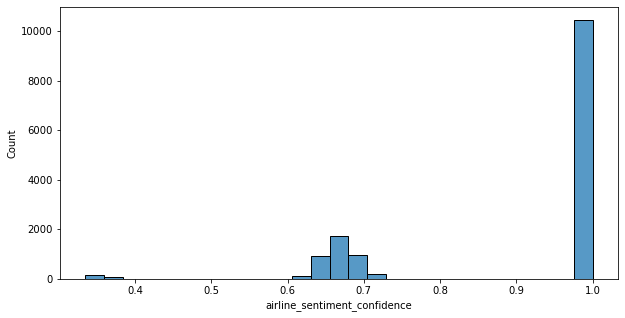

In [10]:
#view the distribution of the airline_sentiment_confidence
fig, axes = plt.subplots(figsize=(10, 5))
axes = sns.histplot(x="airline_sentiment_confidence", data=tweets)

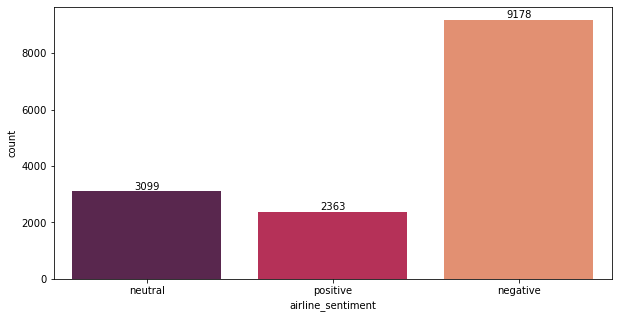

In [11]:
#see the difference between views
fig, axes = plt.subplots(figsize=(10, 5))
axes = sns.countplot(x="airline_sentiment", data=tweets, palette="rocket")

for container in axes.containers:
    axes.bar_label(container)

### Most of the sentiment is negative.

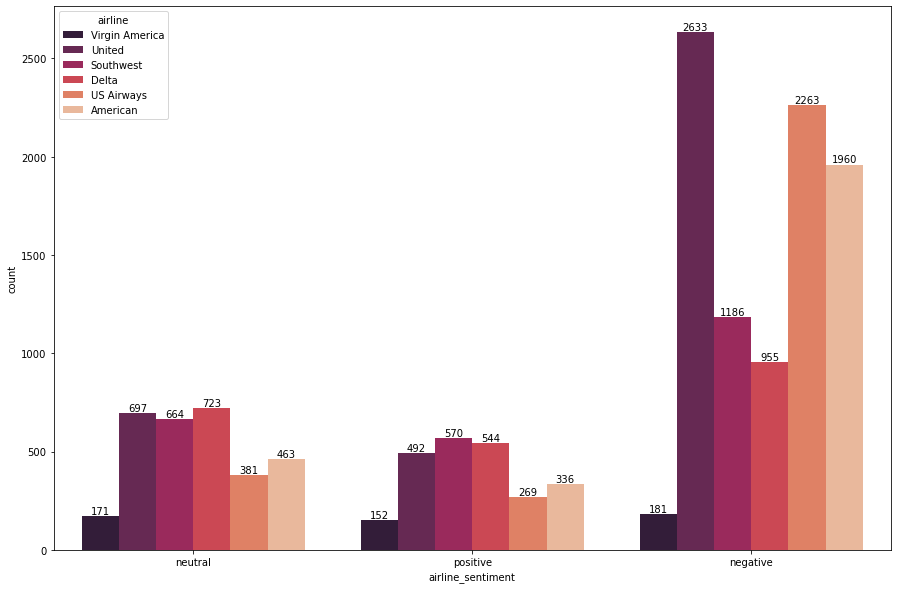

In [12]:
fig, axes = plt.subplots(figsize=(15, 10))
axes = sns.countplot(x="airline_sentiment", hue="airline", data=tweets, palette="rocket")

for container in axes.containers:
    axes.bar_label(container)

In [13]:
#make a function to get most common words

import itertools
import collections

def mostWords(tweet):
    mostWordsTweets = tweet
    
    mostWords = list(itertools.chain(*mostWordsTweets["text"]))
    wordCount = collections.Counter(mostWords)
    wordCount.most_common(20)
    
    #make a dataframe
    wordCountDF = pd.DataFrame(wordCount.most_common(20), columns=["Word", "Count"])
    
    #plot
    fig, axes = plt.subplots(figsize=(15, 5))
    axes = sns.barplot(y="Word", x="Count", data=wordCountDF.head(11), palette="rocket")
    plt.title("Top 26 Words")
    plt.xticks(rotation = 45)

    for container in axes.containers:
        axes.bar_label(container)
    
    #return wordCountDF.head(11)

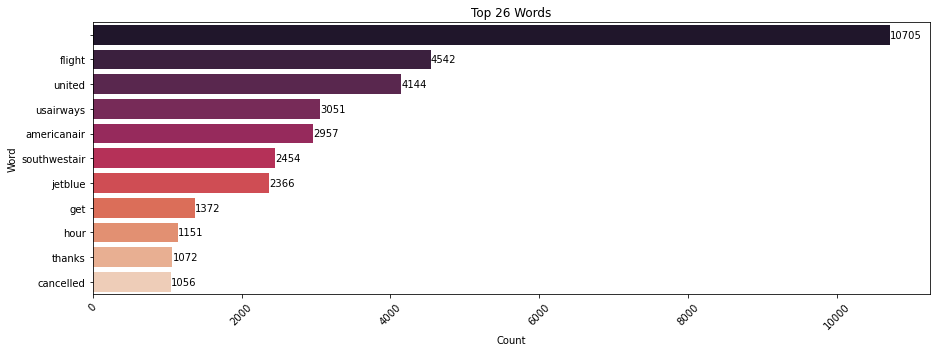

In [14]:
allWords = tweets
mostWords(allWords)

### Word Cloud of overall most common words

### Top words with negative sentiment

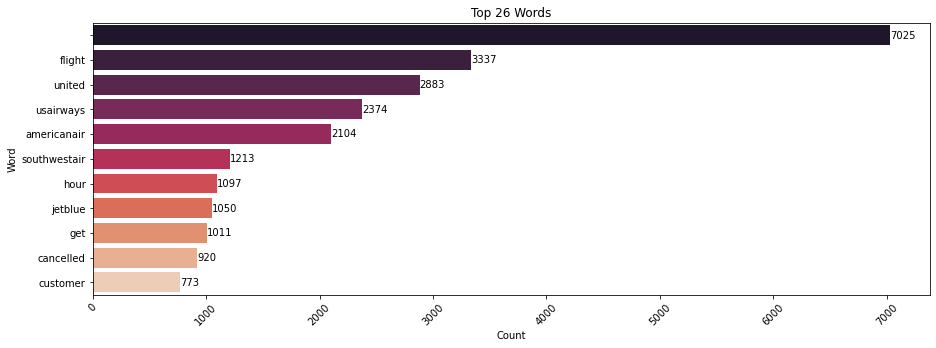

In [17]:
negWords = tweets[tweets["airline_sentiment"] == "negative"]
mostWords(negWords)

### Top words with positive sentiment

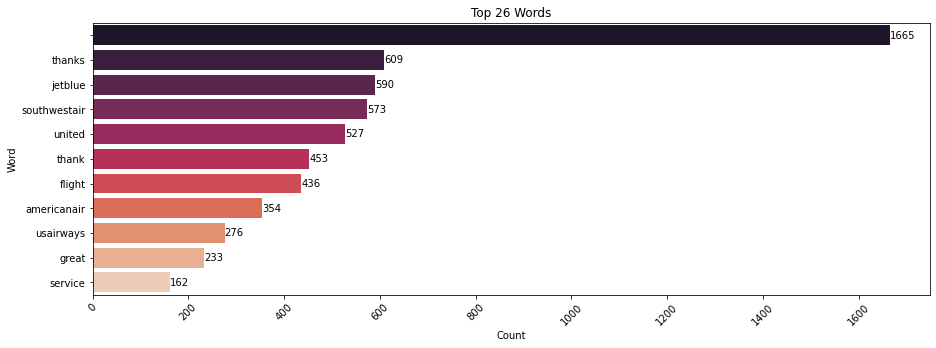

In [19]:
posWords = tweets[tweets["airline_sentiment"] == "positive"]
mostWords(posWords)

### Top words with neutral sentiment

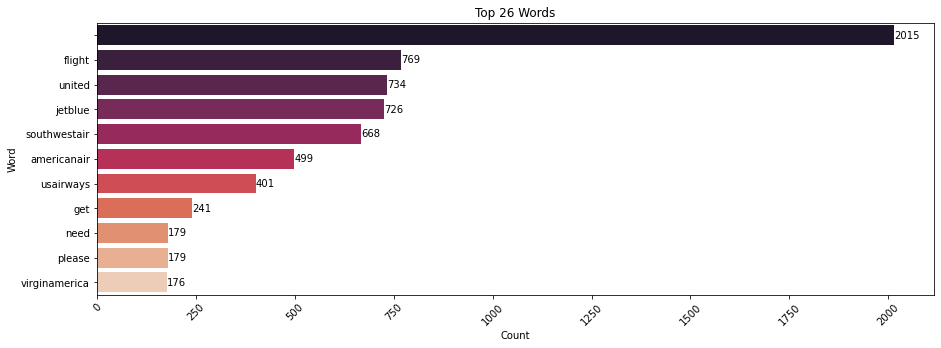

In [21]:
neuWords = tweets[tweets["airline_sentiment"] == "neutral"]
mostWords(neuWords)

### View the amount of retweets in the tweet

In [23]:
#get the top and lowest tweet with retweet
print("The max retweets are: " + str(max(tweets["retweet_count"])))
print("The min retweets are: " + str(min(tweets["retweet_count"])))

The max retweets are: 44
The min retweets are: 0


In [24]:
tweets.sort_values("retweet_count", ascending="False" ).head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,cairdin,0,"[virginamerica, dhepburn, said]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
9681,569720701197750272,negative,1.0,Can't Tell,1.0000,US Airways,jamokee,0,"[usairways, worst]",2015-02-22 20:49:34 -0800,"Sandy Eggo, California",Alaska
9682,569719964023853056,negative,1.0,Customer Service Issue,0.6643,US Airways,MelCMP,0,"[usairways, making, folk, run, gate, c, b, exp...",2015-02-22 20:46:38 -0800,Pennsylvania,Eastern Time (US & Canada)
9683,569719741906075648,negative,1.0,Late Flight,1.0000,US Airways,RishiKumar8,0,"[usairways, waiting, airplane, total, , hour, ...",2015-02-22 20:45:46 -0800,NaN,Quito
9684,569719242427396096,negative,1.0,Cancelled Flight,0.6987,US Airways,MelCMP,0,"[usairways, given, option, new, flight, cant, ...",2015-02-22 20:43:46 -0800,Pennsylvania,Eastern Time (US & Canada)


### View distribution of airline_sentiment_confidence	

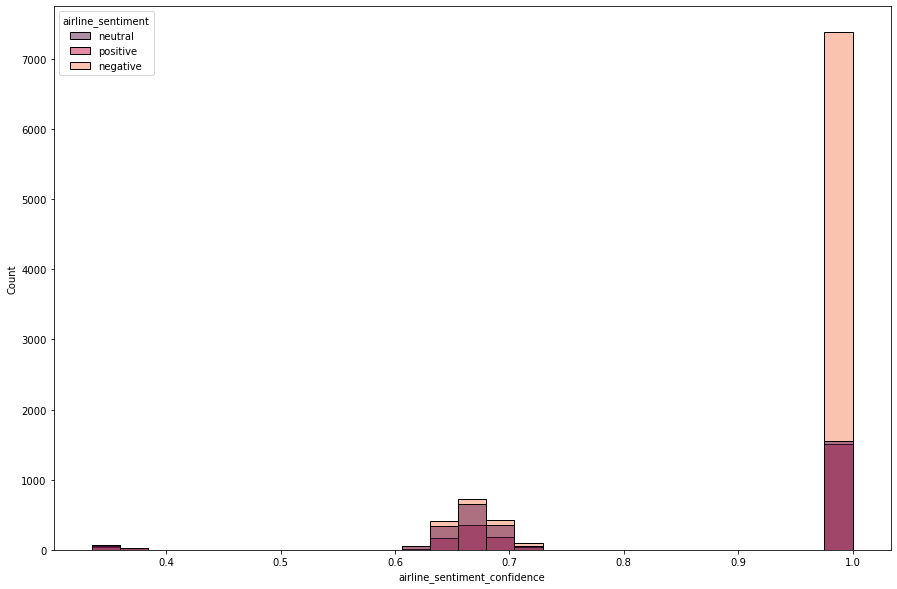

In [25]:
fig, axes = plt.subplots(figsize=(15, 10))
axes = sns.histplot(tweets, x="airline_sentiment_confidence", hue="airline_sentiment", palette="rocket")

#### EDA based on airline <a class="anchor" id="airlineEDA"></a>

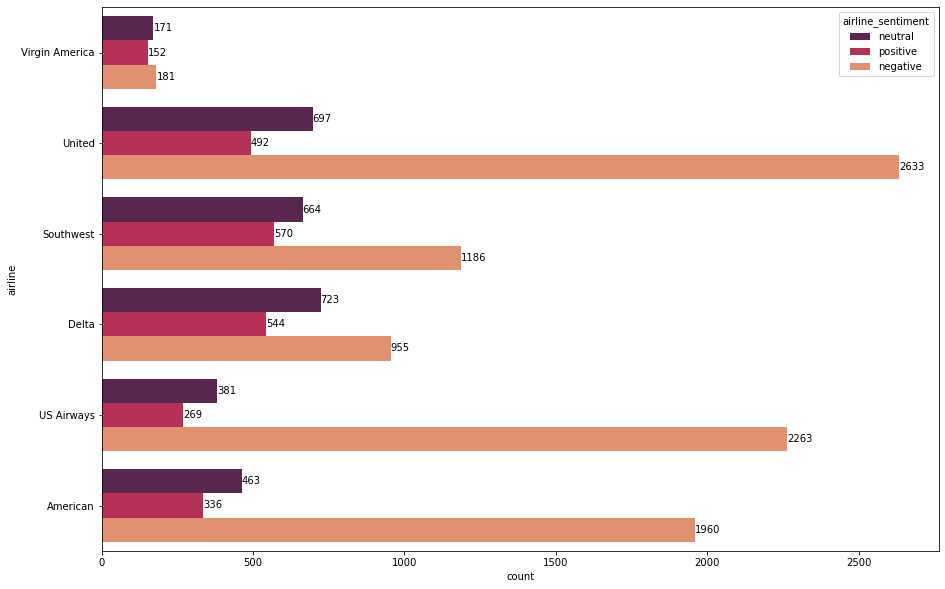

In [26]:
fig, axes = plt.subplots(figsize=(15, 10))
axes = sns.countplot(y="airline", hue="airline_sentiment", data=tweets, palette="rocket")

for container in axes.containers:
    axes.bar_label(container)

### <b>Get the most predictive words by airline</b>

#### Virgin America

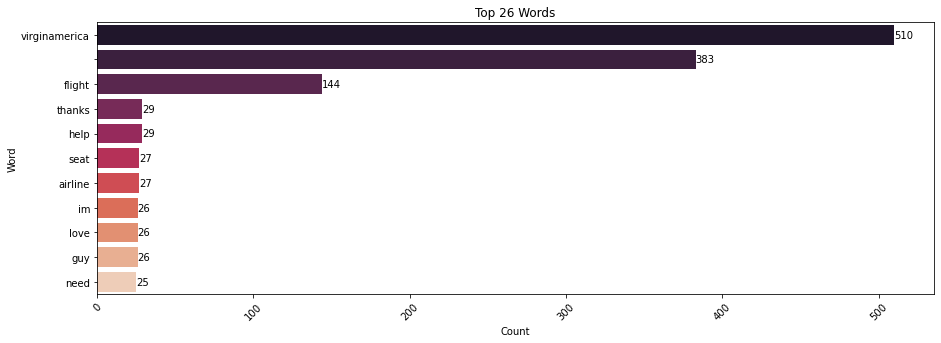

In [27]:
#all words
vaTweets = tweets[tweets["airline"] == "Virgin America"] 
mostWords(vaTweets)

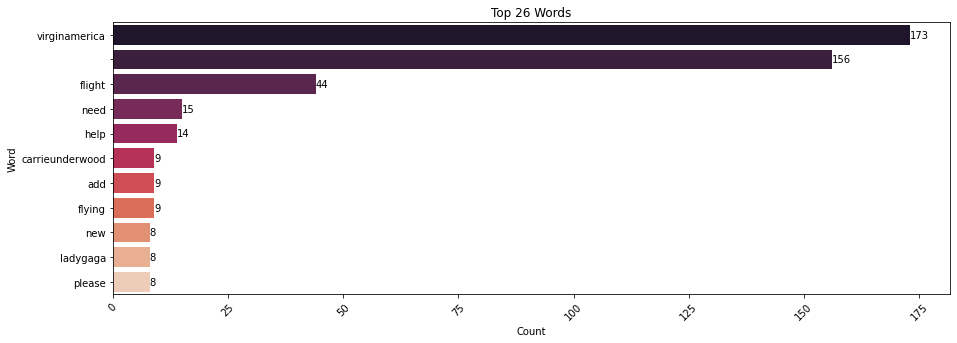

In [28]:
#neutral words
vaTweets = tweets[(tweets["airline"] == "Virgin America") & (tweets["airline_sentiment"] == "neutral")] 
mostWords(vaTweets)

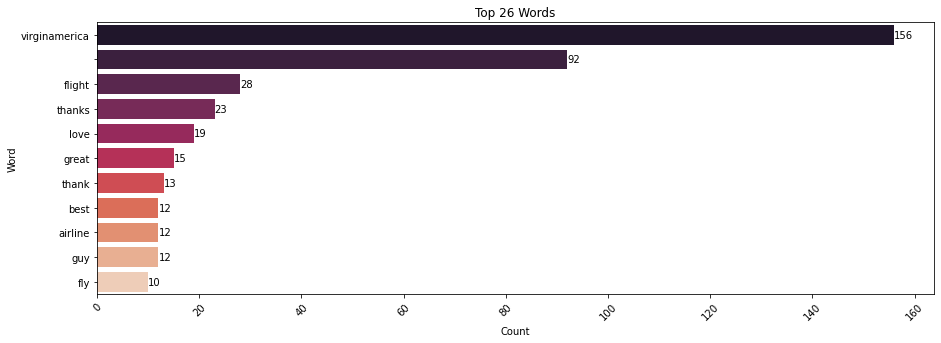

In [29]:
#positive words
vaTweets = tweets[(tweets["airline"] == "Virgin America") & (tweets["airline_sentiment"] == "positive")] 
mostWords(vaTweets)

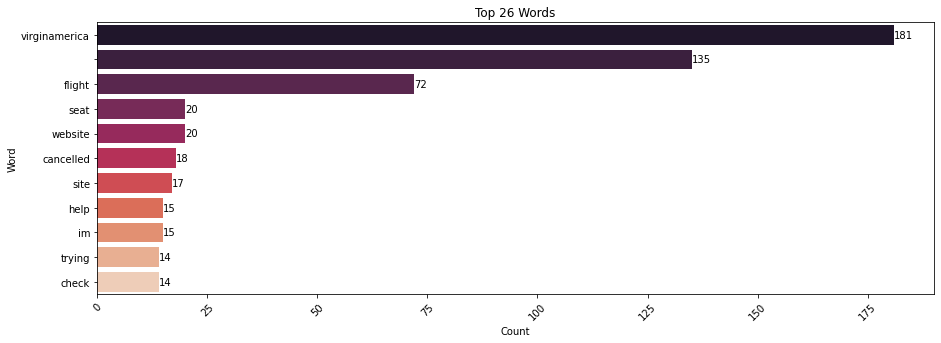

In [30]:
#negative words
vaTweets = tweets[(tweets["airline"] == "Virgin America") & (tweets["airline_sentiment"] == "negative")] 
mostWords(vaTweets)

#### United

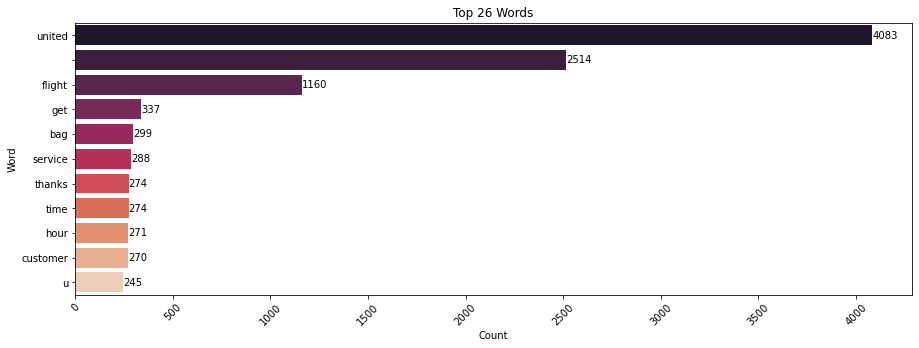

In [31]:
#all word
unitedTweets = tweets[tweets["airline"] == "United"]
mostWords(unitedTweets)

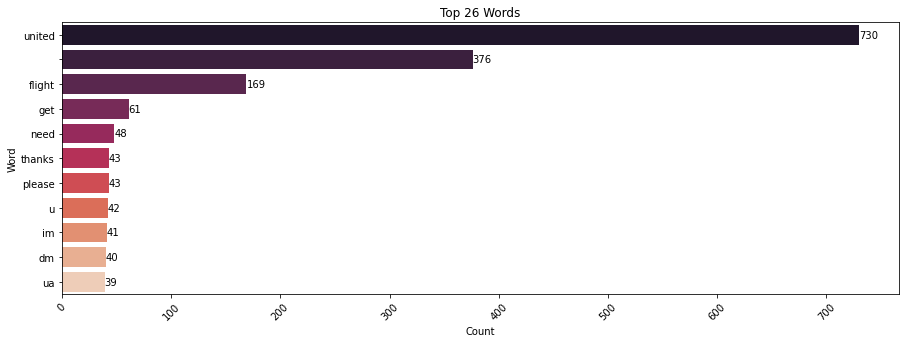

In [32]:
#neutral words
unitedTweets = tweets[(tweets["airline"] == "United") & (tweets["airline_sentiment"] == "neutral")]
mostWords(unitedTweets)

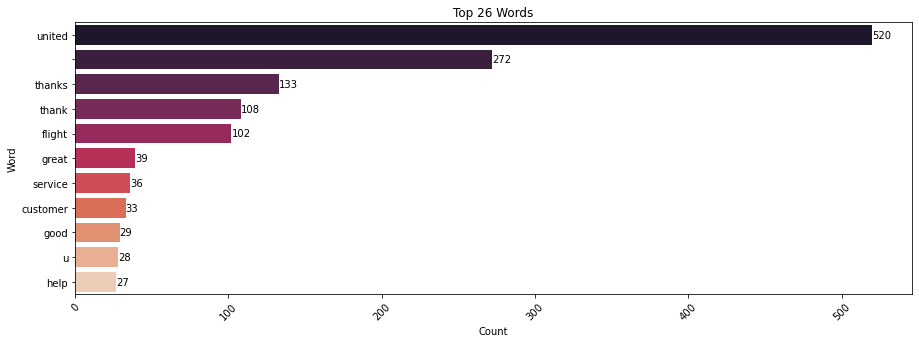

In [33]:
#positive words
unitedTweets = tweets[(tweets["airline"] == "United") & (tweets["airline_sentiment"] == "positive")]
mostWords(unitedTweets)

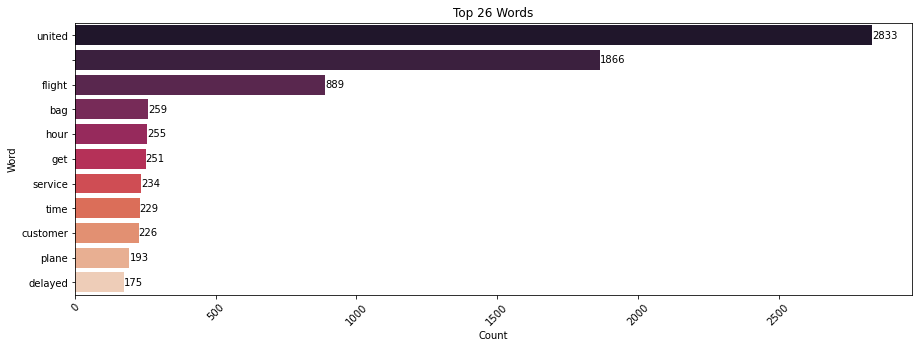

In [34]:
#negative words
unitedTweets = tweets[(tweets["airline"] == "United") & (tweets["airline_sentiment"] == "negative")]
mostWords(unitedTweets)

#### Southwest

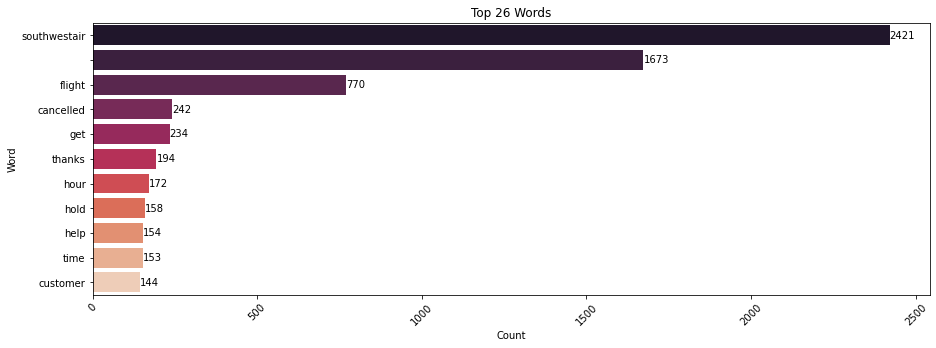

In [35]:
#all words
swTweets = tweets[tweets["airline"] == "Southwest"]
mostWords(swTweets)

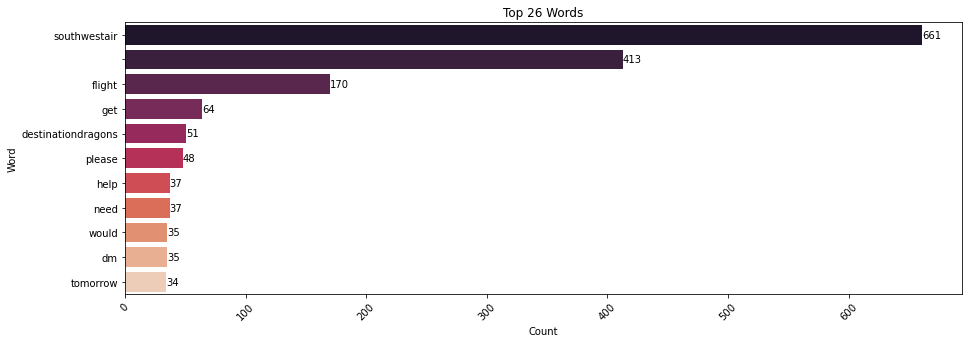

In [36]:
#neutral words
swTweets = tweets[(tweets["airline"] == "Southwest") & (tweets["airline_sentiment"] == "neutral")]
mostWords(swTweets)

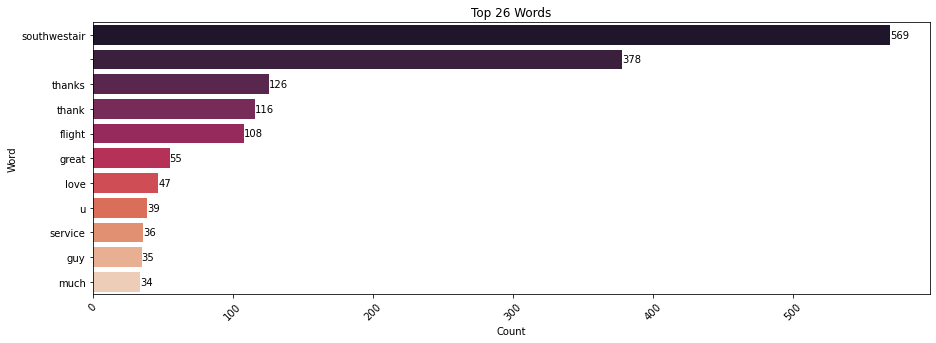

In [37]:
#positive words
swTweets = tweets[(tweets["airline"] == "Southwest") & (tweets["airline_sentiment"] == "positive")]
mostWords(swTweets)

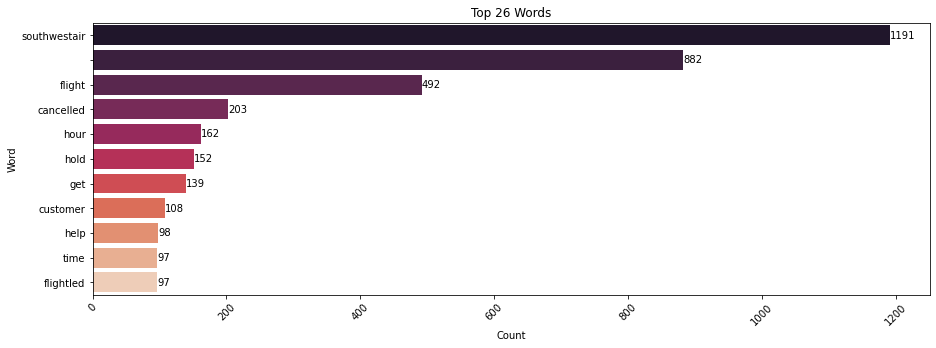

In [38]:
#neutral words
swTweets = tweets[(tweets["airline"] == "Southwest") & (tweets["airline_sentiment"] == "negative")]
mostWords(swTweets)

#### Delta

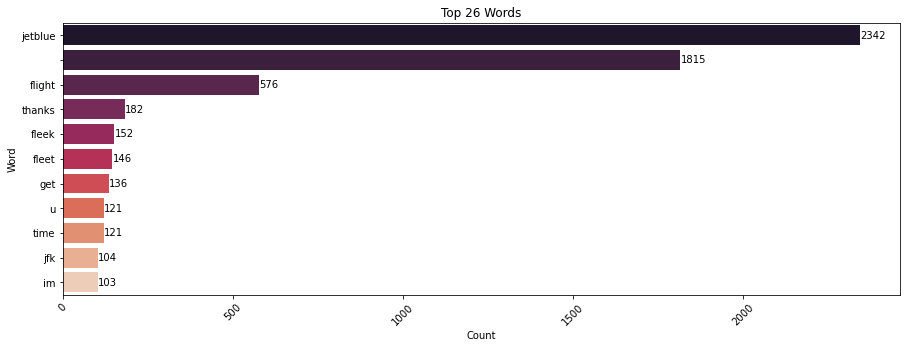

In [39]:
#all words
deltaTweets = tweets[tweets["airline"] == "Delta"]
mostWords(deltaTweets)

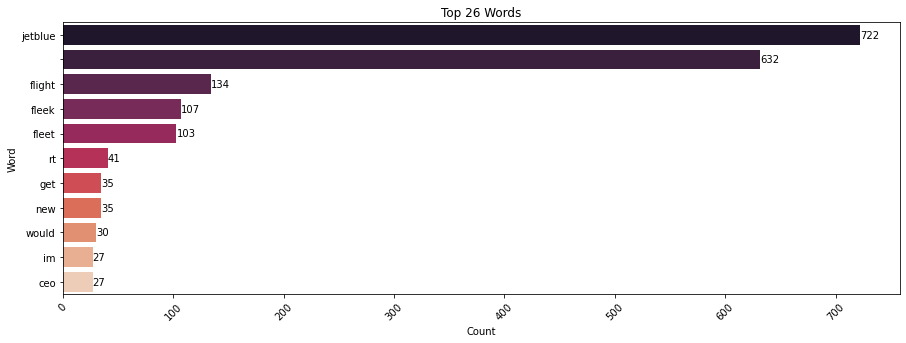

In [40]:
#neutral
deltaTweets = tweets[(tweets["airline"] == "Delta")& (tweets["airline_sentiment"] == "neutral")]
mostWords(deltaTweets)

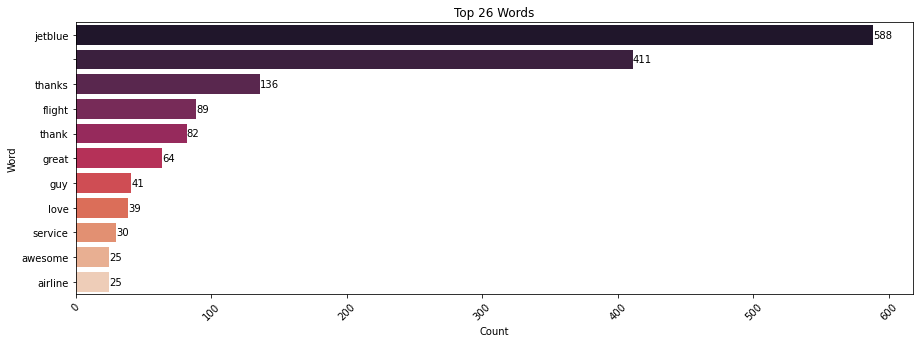

In [41]:
#positive
deltaTweets = tweets[(tweets["airline"] == "Delta")& (tweets["airline_sentiment"] == "positive")]
mostWords(deltaTweets)

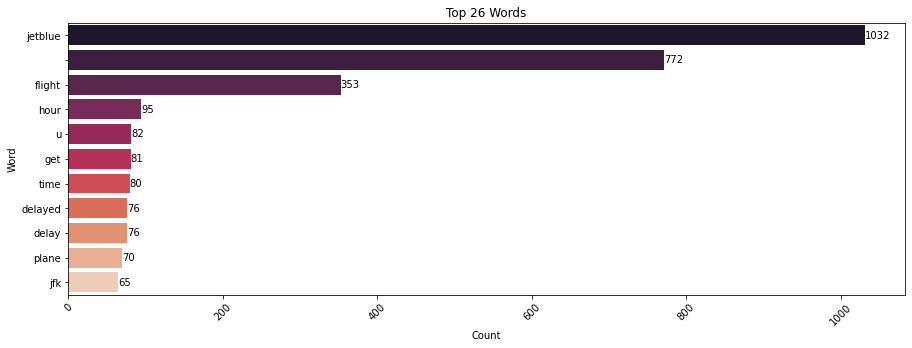

In [42]:
#negative
deltaTweets = tweets[(tweets["airline"] == "Delta")& (tweets["airline_sentiment"] == "negative")]
mostWords(deltaTweets)

#### US Airways

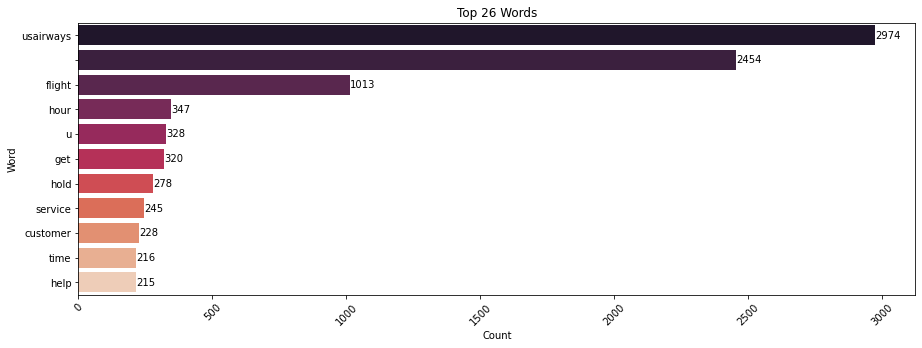

In [43]:
#all words
usTweets = tweets[tweets["airline"] == "US Airways"]
mostWords(usTweets)

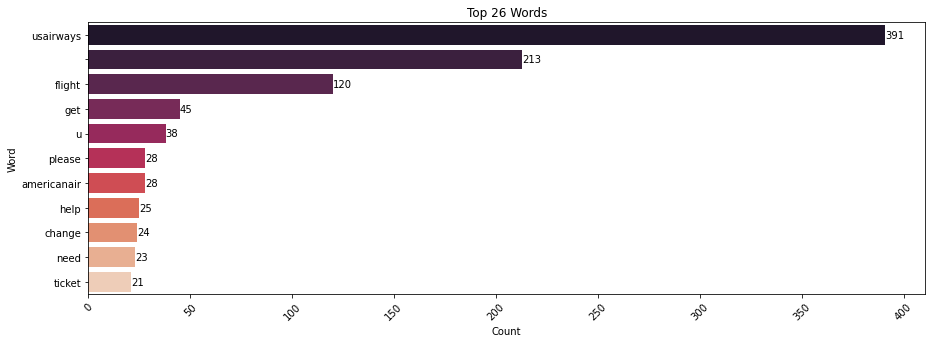

In [44]:
#neutral words
usTweets = tweets[(tweets["airline"] == "US Airways")& (tweets["airline_sentiment"] == "neutral")]
mostWords(usTweets)

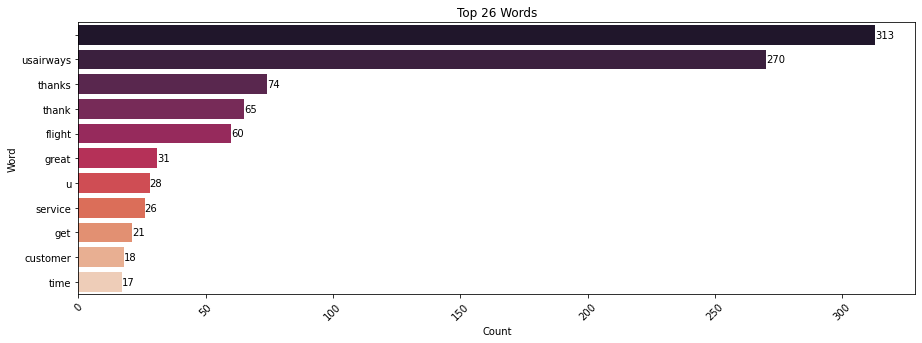

In [45]:
#positive words
usTweets = tweets[(tweets["airline"] == "US Airways")& (tweets["airline_sentiment"] == "positive")]
mostWords(usTweets)

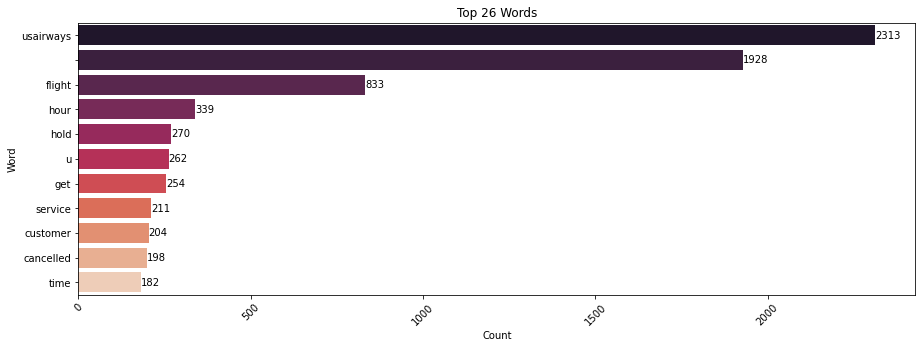

In [46]:
#negative words
usTweets = tweets[(tweets["airline"] == "US Airways")& (tweets["airline_sentiment"] == "negative")]
mostWords(usTweets)

#### American

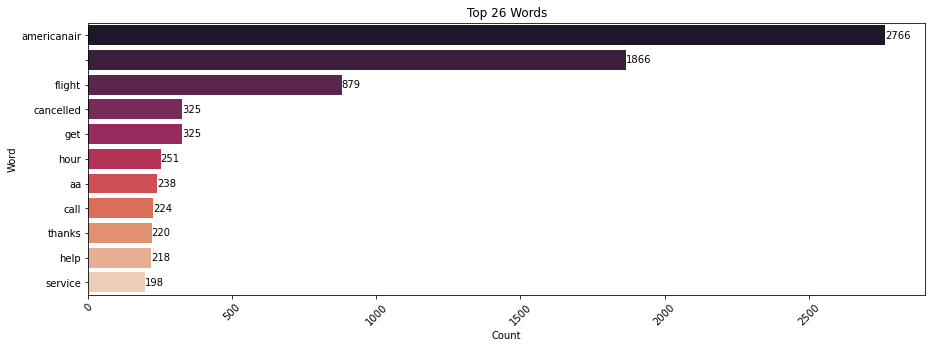

In [47]:
#all words
americanTweets = tweets[tweets["airline"] == "American"]
mostWords(americanTweets)

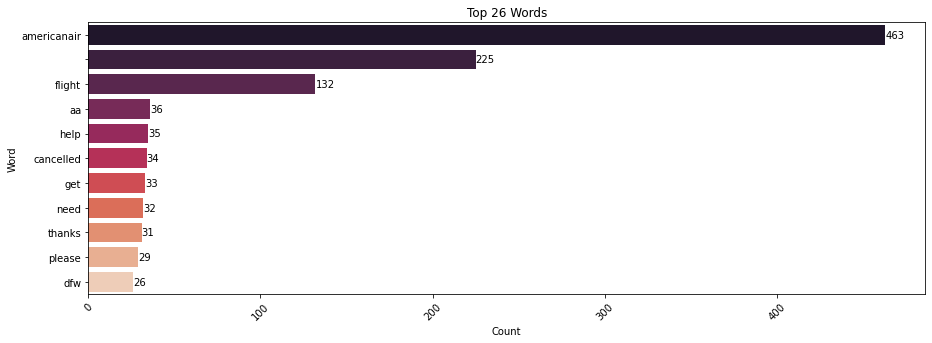

In [48]:
#neutral words
americanTweets = tweets[(tweets["airline"] == "American") & (tweets["airline_sentiment"] == "neutral")]
mostWords(americanTweets)

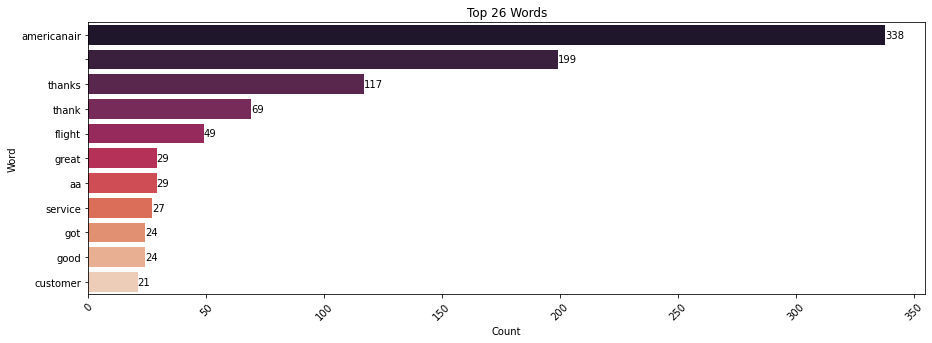

In [49]:
#positive words
americanTweets = tweets[(tweets["airline"] == "American") & (tweets["airline_sentiment"] == "positive")]
mostWords(americanTweets)

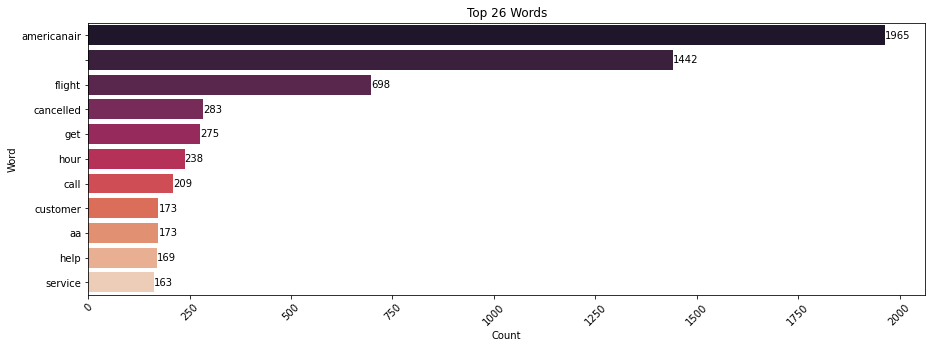

In [50]:
#negative words
americanTweets = tweets[(tweets["airline"] == "American") & (tweets["airline_sentiment"] == "negative")]
mostWords(americanTweets)

### Let's look at the negative reason

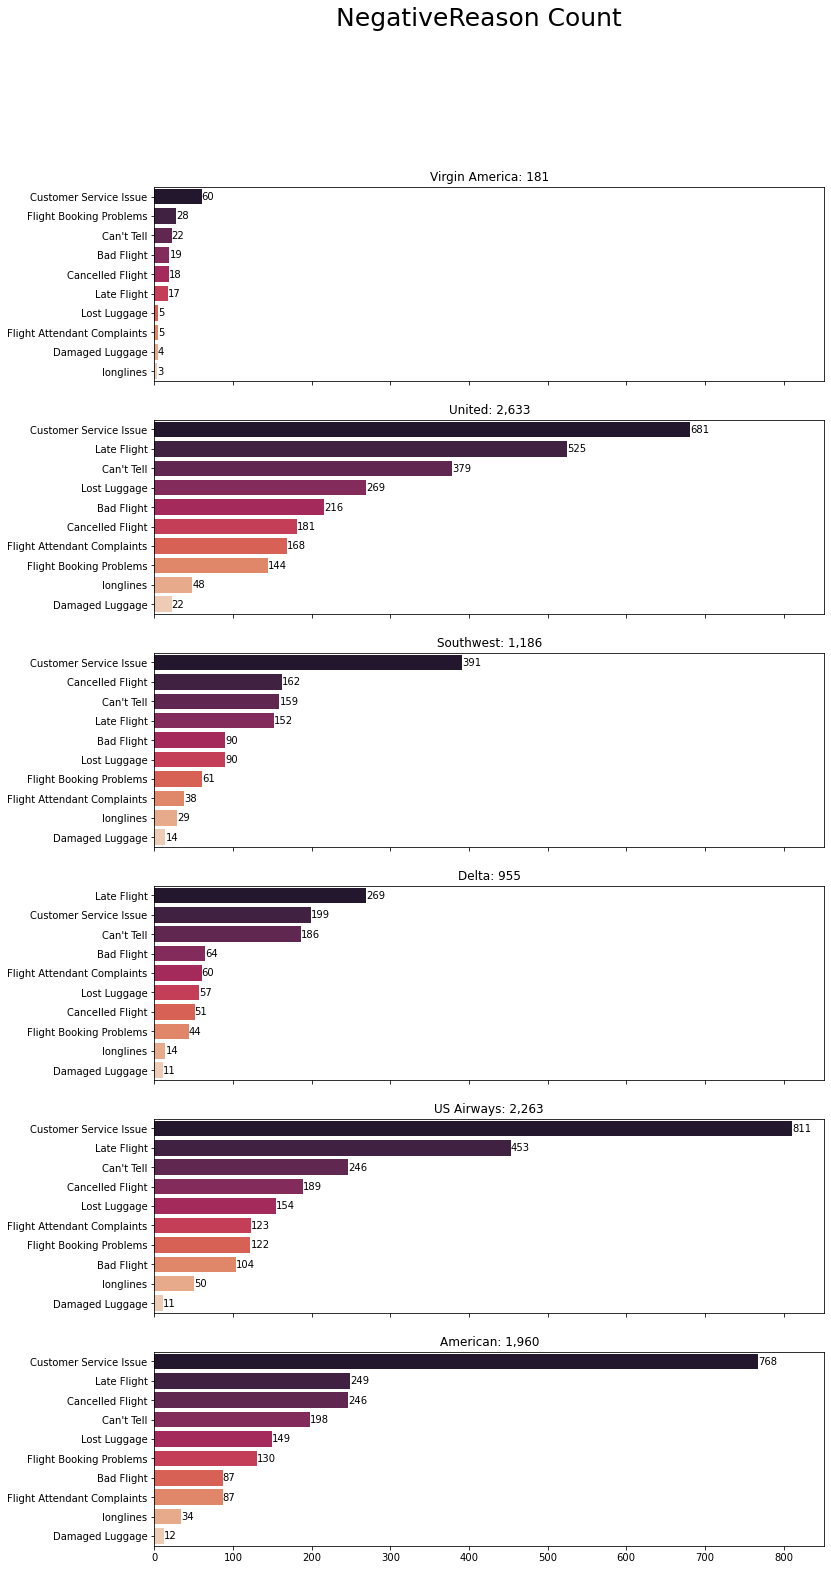

In [55]:
negDF = tweets[tweets["airline_sentiment"] == "negative"]

fig, axes = plt.subplots(6, 1, figsize=(12, 25), sharex=True)
axes = axes.flatten()
names = negDF['airline'].unique()

for name, n in zip(names, axes):
    ax = sns.countplot(data = negDF[negDF.airline==name], y = 'negativereason',
                       palette='rocket',
                       order = negDF[negDF.airline==name].negativereason.value_counts().index, ax = n)
    ax.bar_label(ax.containers[0])
    ax.set_title(f"{name}: {format(len(negDF[negDF.airline==name]),',')}")
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("NegativeReason Count", fontsize = 25)
plt.show()